In [1]:
import os
import subprocess

out_dir = "netcdf"
subprocess.check_call([
    "tdm_rainfall", "-l", "60", "-o", out_dir,
    "data/radarsample/cag01est2400",
    "data/radarsample/radarfootprint.tif",
])

0

In [2]:
nc_path = os.path.join(out_dir, os.listdir(out_dir)[0])
nc_path

'netcdf/2018-05-01_23:00:04.nc'

TDM radar datasets store rainfall data in a 30 Km radius around Cagliari. Data format is [NetCDF4, CF-1.7 conventions](http://cfconventions.org).

In [3]:
def dump_ncattrs(obj, indent=0):
    for k in obj.ncattrs():
        print("%s%s: %s" % (" " * indent, k, obj.getncattr(k)))

from netCDF4 import Dataset
ds = Dataset(nc_path, "r")
dump_ncattrs(ds)

Conventions: CF-1.7
title: Rainfall
institution: TDM
source: Radar
references: http://www.tdm-project.it
history: Estimated with https://github.com/tdm-project/tdm-tools


In [4]:
for k, v in ds.variables.items():
    print("%s:" % k)
    dump_ncattrs(v, indent=2)

time:
  long_name: time
  standard_name: time
  units: seconds since 2018-05-01 23:00:04
x:
  long_name: x coordinate of projection
  standard_name: projection_x_coordinate
  units: m
y:
  long_name: y coordinate of projection
  standard_name: projection_y_coordinate
  units: m
lat:
  long_name: latitude coordinate
  standard_name: latitude
  units: degrees_north
lon:
  long_name: longitude coordinate
  standard_name: longitude
  units: degrees_east
rainfall_rate:
  _FillValue: -1.0
  least_significant_digit: 4
  long_name: estimated rainfall rate
  standard_name: rainfall_rate
  coordinates: lat lon
  grid_mapping: crs
  units: mm/hour
crs:
  grid_mapping_name: transverse_mercator
  longitude_of_central_meridian: 9.0
  latitude_of_projection_origin: 0.0
  false_easting: 1500000.0
  false_northing: 0.0
  scale_factor_at_central_meridian: 0.9996
  semi_major_axis: 6378388.0
  inverse_flattening: 297
  projected_coordinate_system_name: EPSG:3003 Monte Mario / Italy zone 1
  geographic_co

Data planes are stored in `rainfall_rate`, one per time point

In [5]:
t = ds.variables["time"]
t

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: time
    standard_name: time
    units: seconds since 2018-05-01 23:00:04
unlimited dimensions: 
current shape = (60,)
filling off

In [6]:
import cf_units
tu = cf_units.Unit(t.units)
dts = [tu.num2date(_) for _ in t]
print("time range: from %s to %s" % (dts[0], dts[-1]))

time range: from 2018-05-01 23:00:04 to 2018-05-01 23:59:05


In [7]:
rr = ds.variables["rainfall_rate"]
rr

<class 'netCDF4._netCDF4.Variable'>
float32 rainfall_rate(time, x, y)
    _FillValue: -1.0
    least_significant_digit: 4
    long_name: estimated rainfall rate
    standard_name: rainfall_rate
    coordinates: lat lon
    grid_mapping: crs
    units: mm/hour
unlimited dimensions: 
current shape = (60, 1024, 1024)
filling on

Note that image planes are [masked arrays](https://docs.scipy.org/doc/numpy/reference/maskedarray.html) (data contains invalid values).

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def show_rain(rain, dt):
    plt.cla()
    plt.clf()
    plt.figure(dpi=144)
    c = plt.contourf(rain, levels=np.arange(0, 3, 0.1))
    cbar = plt.colorbar(c)
    plt.title("rainfall @ %s" % dt)
    plt.gca().set_aspect("equal")

<Figure size 432x288 with 0 Axes>

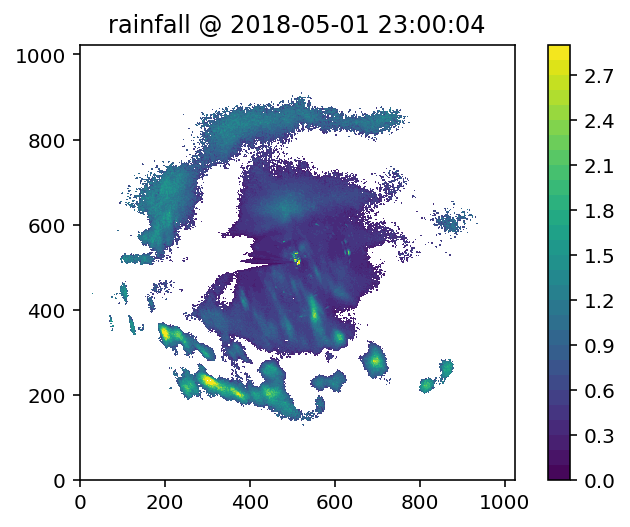

In [9]:
show_rain(rr[0], dts[0])

In [10]:
ds.close()